## GRADIENTS

We will be using gradients for detecting edges in images, which allows us to find contours and outlines of objects in images.

In [1]:
# import the necessary packages
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import argparse
import cv2
import numpy as np

In [2]:
from google.colab import files
apj = files.upload()

Saving apj.jpg to apj.jpg


Original Image


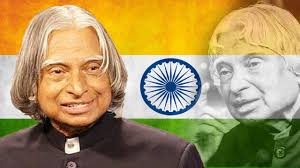



Grayscale Image


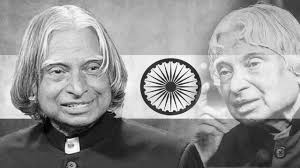

In [3]:
# load the image, convert it to grayscale, and display the original image
image = cv2.imread("apj.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original Image")
cv2_imshow(image)
print("\n")
print("Grayscale Image")
cv2_imshow(gray)
print("\n")

In [4]:
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

# compute the gradient magnitude and orientation, respectively
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi)
print ("Gradient magnitude value: {}".format(mag))
print("\n")
print ("Gradient orientation value: {}".format(orientation))

Gradient magnitude value: [[ 0.         12.         16.         ...  0.          0.
   0.        ]
 [20.         23.32380758 24.20743687 ...  0.          0.
   0.        ]
 [22.         23.70653918 24.41311123 ...  4.          4.
   4.        ]
 ...
 [ 0.          4.          0.         ... 24.41311123 34.17601498
  38.        ]
 [ 0.          4.          0.         ... 27.89265136 29.73213749
  20.        ]
 [ 0.          4.          0.         ... 34.         38.
   0.        ]]


Gradient orientation value: [[   0.            0.            0.         ...    0.
     0.            0.        ]
 [  90.           59.03624347   51.70983681 ...    0.
     0.            0.        ]
 [  90.           62.35402464   55.0079798  ...  -90.
   -90.          -90.        ]
 ...
 [   0.            0.            0.         ... -124.9920202
  -110.55604522  -90.        ]
 [   0.            0.            0.         ...  165.46554492
  -160.34617594  -90.        ]
 [   0.            0.            0.    

Grayscale Image


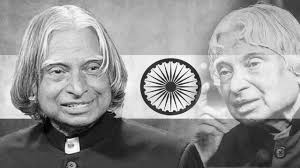



Sobel X gradient Image


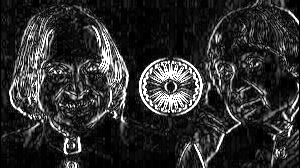



Sobel Y gradient Image


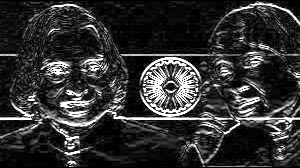



Sobel gradients combined Image


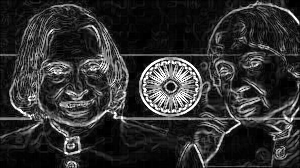

In [5]:
# the `gX` and `gY` images are now of the floating point data type,
# so we need to take care to convert them back a to unsigned 8-bit
# integer representation so other OpenCV functions can utilize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

# combine the sobel X and Y representations into a single image
sobelCombined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

# show our output images
print("Grayscale Image")
cv2_imshow(gray)
print("\n")
print("Sobel X gradient Image")
cv2_imshow(gX)
print("\n")
print("Sobel Y gradient Image")
cv2_imshow(gY)
print("\n")
print("Sobel gradients combined Image")
cv2_imshow(sobelCombined)
print("\n")